<h1 style="color:rgb(0,120,170)">Machine Learning: Unsupervised Techniques</h1>
<h1 style="color:rgb(0,120,170)">Assignment 2a: Maximum Likelihood</h1>

<h2 style="color:rgb(0,120,170)">Task 1: Formula for Maximum Likelihood of Poisson Distribution</h2>

Compute the Maximum Likelihood Estimator for the parameter $\lambda > 0$ of a
Poisson distribution. This means: Assuming we have data samples ${x_{1},x_{2},...,x_{n}}$, we want to
find the $\lambda$ that maximizes the likelihood

$$
\mathcal{L}(\lambda) = \prod_{i=1}^{n} \mathcal{P}(x_{i}; \lambda) = \prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda}
$$


**Hint:** You will have a much easier time if you compute with the log-likelihood as compared to the likelihood.

You should arrive at this solution: $\hat{\lambda} = \frac{\sum_{i=1}^{n} x_{i}}{{n}}$.

<h3 style="color:rgb(210,90,80)">Calculation (25 points):</h3>

Your calculation here.

\begin{align*}
ln L({x};\lambda) = ln \prod_{i=1}^n p(x_i; \lambda) &= \sum_{i=1}^n ln p(x_i, \lambda)\\
&= \sum_{i=1}^n ln \left(\frac{\lambda^{x_i}}{x_i! \cdot e^{\lambda}}\right)\\
&= \sum_{i=1}^n (ln \lambda^{x_i}) - \sum_{i=1}^n (ln x_i!) + \sum_{i=1}^n ln\left(\frac{1}{e^\lambda}\right)\\
&= \sum_{i=1}^n (ln \lambda^{x_i}) - \sum_{i=1}^n (ln x_i!) + \sum_{i=1}^n -\lambda\\
&= \sum_{i=1}^n (ln \lambda^{x_i}) - \sum_{i=1}^n (ln x_i!) -\lambda n\\
\end{align*}

Now take the partial derivative of it as one step of the maximation process:
\begin{align*}
&\frac{\partial \sum_{i=1}^n (ln \lambda^{x_i}) - \sum_{i=1}^n (ln x_i!) -\lambda n}{\partial \lambda}
= \frac{\partial \sum_{i=1}^n (ln \lambda^{x_i})}{\partial \lambda} - \frac{\partial\sum_{i=1}^n (ln x_i!)}{\partial \lambda} - \frac{\partial \lambda n}{\partial \lambda}
\\
\\
&\frac{\partial \sum_{i=1}^n (ln \lambda^{x_i})}{\partial \lambda} 
=  \sum_{i=1}^n \left(\frac{1}{\lambda^{x_i}}\cdot x_i \lambda^{x_i-1}\right)
=  \sum_{i=1}^n \left(\frac{1}{\lambda^{x_i}}\cdot x_i \lambda^{x_i-1}\right)
=  \sum_{i=1}^n \left(\frac{x_i}{\lambda^{x_i}}\cdot \frac{\lambda^{x_i}}{\lambda}\right)
= \sum_{i=1}^n \left(\frac{x_i}{\lambda}\right)
\\
\\
&\frac{\partial \sum_{i=1}^n (ln x_i!)}{\partial \lambda} = 0
\\\\
&\frac{\partial \lambda n}{\partial \lambda} = n\\\\
&\text{It follows:}\\
& \frac{\partial \sum_{i=1}^n (ln \lambda^{x_i})}{\partial \lambda} - \frac{\partial\sum_{i=1}^n (ln x_i!)}{\partial \lambda} - \frac{\partial \lambda n}{\partial \lambda}
= \sum_{i=1}^n \left(\frac{x_i}{\lambda}\right) - 0 - n
\\
\end{align*}

Next step: Set derivative to 0 to get the maximal point of log L:
\begin{align*}
&\sum_{i=1}^n\left(\frac{x_i}{\hat{\lambda}}\right) - 0 - n = 0\\
& n = \left(\frac{\sum_{i=1}^n x_i}{\hat{\lambda}}\right) \\
& \hat{\lambda} = \frac{1}{n} \sum_{i=1}^n x_i
\end{align*}

solution: lambda hat only in the last line introduced

<h2 style="color:rgb(0,120,170)">Task 2: Implementation</h2>

Plot the log-likelihood from the previous task as a function of $\lambda$ and mark the
position where the maximum occurs. Use the data stored in poisson.csv for this task. As
possible values for $\lambda$ we suggest values from $1$ to $50$ with a step size of $0.5$, i.e. $(1.0, 1.5, 2.0, ...).$ 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_df = pd.read_csv('poisson.csv',header=None)

# print the head of the dataset, good practice
data_df.head()

,0
0,11
1,10
2,11
3,9
4,12


In [4]:
X = data_df.values

print(type(data_df))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


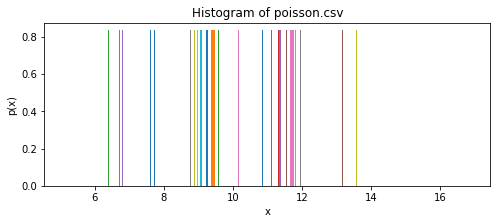

In [5]:
plt.figure(figsize=(8,3))
f = plt.hist(data_df.T,density=len(data_df))
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of poisson.csv');
plt.show()

**Log Likelihood:**

In [6]:
import math

def loglikelihood(x, lam):
    if lam == 0:
        return -1
    lnL = 0 
    for xi in x:
        lnL += xi*np.log(lam)-np.log(math.factorial(xi))-lam
    return lnL

In [7]:
#test the function
lam_set = np.linspace(1,50,99)

print("lnL(1)  = %9.2f"%loglikelihood(X,lam_set[0]))
print("lnL(10) = %9.2f"%loglikelihood(X,lam_set[9*2]))
print("lnL(20) = %9.2f"%loglikelihood(X,lam_set[19*2]))
print("lnL(30) = %9.2f"%loglikelihood(X,lam_set[29*2]))
print("lnL(40) = %9.2f"%loglikelihood(X,lam_set[39*2]))
print("lnL(50) = %9.2f"%loglikelihood(X,lam_set[49*2]))

lnL(1)  = -17657.38
lnL(10) =  -2256.88
lnL(20) =  -4911.60
lnL(30) = -10614.89
lnL(40) = -17566.32
lnL(50) = -25201.67


<h3 style="color:rgb(0,120,170)">Task:</h3>

* Implement the estimator_formula function returning the analytic solution for lambda-hat

<h3 style="color:rgb(210,90,80)">Code (5 points):</h3>

In [8]:
def estimator_formula(X):
    """ the estimator returns lambda-hat according to the result of the calculation in task 1"""
    
##############################
# Begin your code
    # X is array consisting of single x_i, therefore:
    X_summed = X.sum()
    number_samples = len(X)
    lam_max_formula = X_summed/number_samples
    
    # alternative sol: return X.mean()
    

# End your code
##############################
    
    return lam_max_formula

In [9]:
lam_max_formula = estimator_formula(X)
print('Likelihood is maximal at lambda-hat (formula) = %9.3f'%lam_max_formula)
print('            Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max_formula))

Likelihood is maximal at lambda-hat (formula) =    10.597
            Log-Likelihood at this lambda-hat = -2239.405


<h3 style="color:rgb(0,120,170)">Task:</h3>

* Implement the estimator_data function returning an estimate for lambda-hat numerically using argmax over the suggested support points of lambda

<h3 style="color:rgb(210,90,80)">Code (5 points):</h3>

In [10]:
def estimator_support(X, lam_set): # lam_set is array of the intervall over all possible lambda_values
    loglikelih = [loglikelihood(X,lami) for lami in lam_set] # get the single likelihoods for all possible lambdas

##############################
# Begin your code

    biggest_index = np.argmax(loglikelih) # gives us the index of the biggest element
    lam_max = lam_set[biggest_index] # find the lambda with the biggest loglikelihood

    # End your code
##############################

    ln_min = np.min(loglikelih)
    ln_max = np.max(loglikelih)
    
    return loglikelih, ln_min, ln_max, lam_max

In [11]:
loglikelih, ln_min, ln_max, lam_max = estimator_support(X, lam_set)
print('Likelihood is maximal at lambda-hat (argmax) = %9.3f'%lam_max)
print('           Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max))

Likelihood is maximal at lambda-hat (argmax) =    10.500
           Log-Likelihood at this lambda-hat = -2239.852


<h3 style="color:rgb(0,120,170)">Task:</h3>

* Implement the loglikelih function over lam_set
* Mark the maxima in the plot according to estimator_formula and estimator_support

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

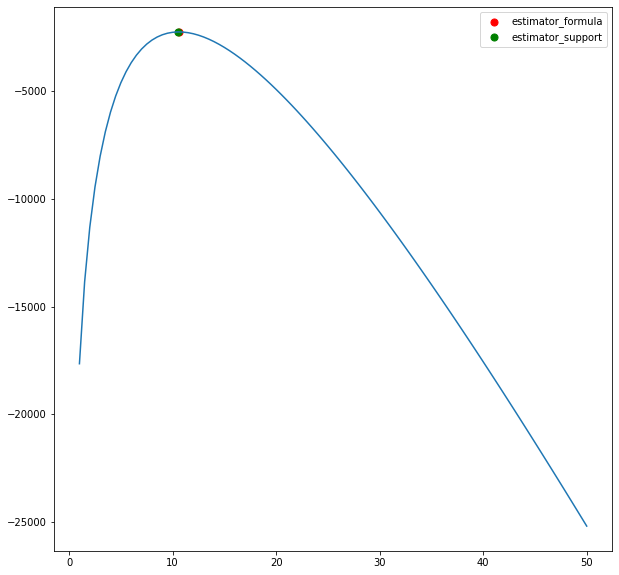

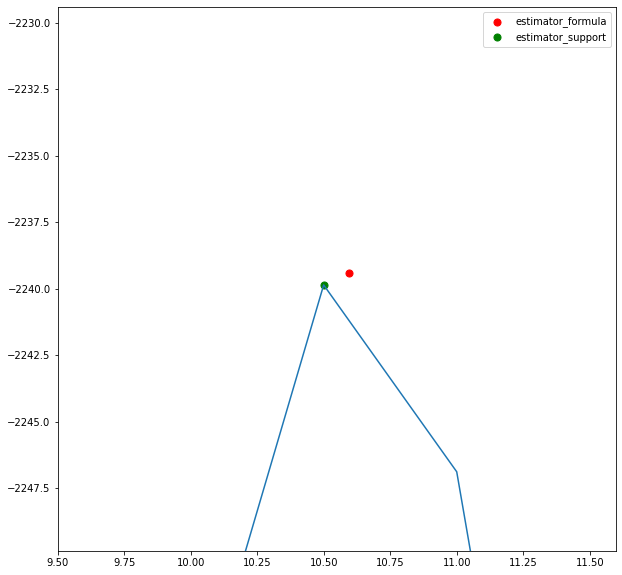

In [13]:
##############################
# Begin your code
plt.figure(figsize=(10,10))
plt.plot(lam_set, loglikelih)
plt.scatter(lam_max_formula, loglikelihood(X,lam_max_formula), label='estimator_formula',c='red',s=50)
plt.scatter(lam_max, loglikelihood(X,lam_max),label='estimator_support',c='green',s=50)
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.plot(lam_set, loglikelih)
plt.scatter(lam_max_formula, loglikelihood(X,lam_max_formula), label='estimator_formula',c='red',s=50)
plt.scatter(lam_max, loglikelihood(X,lam_max),label='estimator_support',c='green',s=50)
plt.legend()
plt.xlim(min(lam_max, lam_max_formula)-1, max(lam_max, lam_max_formula)+1)
plt.ylim(min(loglikelihood(X,lam_max_formula),loglikelihood(X,lam_max))-10,max(loglikelihood(X,lam_max_formula),loglikelihood(X,lam_max))+10)
plt.show()


# End your code
##############################

Alter sol:


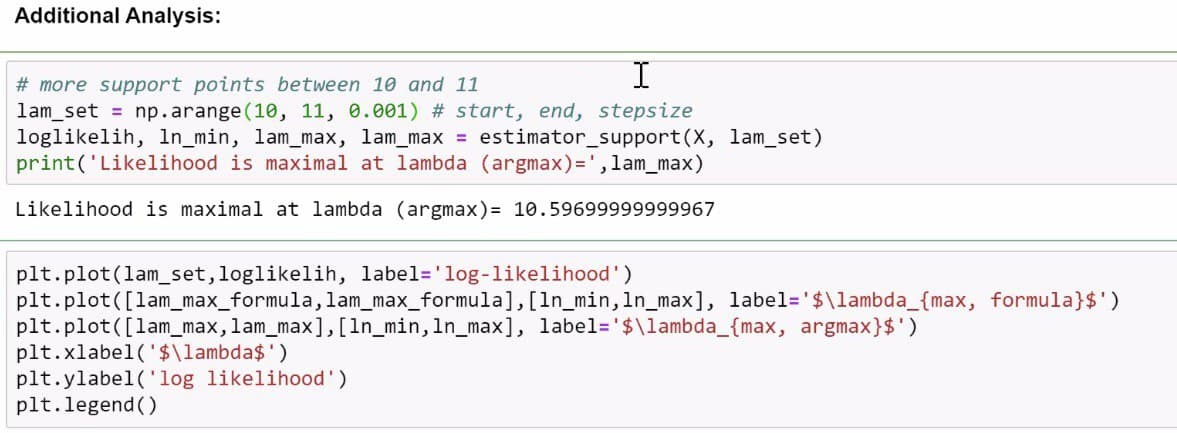

In [2]:
from IPython.display import Image
print('Alter sol:')
Image("pic1_as2_01.jpg")

<h3 style="color:rgb(0,120,170)">Task:</h3>

* Explain and discuss the result in your own words. Where is the maximum?

<h3 style="color:rgb(208,90,80)">Question (5 points)</h3>

Your answer here (two sentences).

The parameter estimated by formula is at the maximum and so the most probable parameter estimation with which we can rebuild the data distribution. On the second plot this parameter estimation doesn't lay on the log likelihood function curve because the curve wasn't constructed by a continuous interval for all possible lambda (else it parameter estimation would lay on curve).

sol: Depends on how good/accurate your support set is. Good when lot of lambdas calculated in small steps. Resulting lambda could be even closer to max.